In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas import read_csv
from os import listdir
from os.path import isfile, join
import re
from hnc.hnc.constants import *
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (5,3.5)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['xtick.labelsize']=14


In [2]:
class npa_information( ):
    def __init__(self, fname, TFW=False, ignore_vxc=False):
        # Load header information
        with open(fname) as f:
            file_info = f.readlines()
    
        self.convergence_info = file_info[1]
        
        self.info_dict = dict(json.loads(file_info[2].strip("#")))
        info_dict = self.info_dict
        
        self.name  = info_dict['name']
        self.μ     = info_dict['μ[AU]']
        self.Z     = info_dict['Z']
        self.A     = info_dict['A']
        self.Zstar = info_dict['Zstar']
        self.Te     = info_dict['Te[AU]']
        self.Ti     = info_dict['Ti[AU]']
        self.rs    = info_dict['rs[AU]']
    
        # Load all data
        data = read_csv(fname, delim_whitespace=True, header=0, comment='#')
        self.data = data
        self.ne   = data['n[AU]']
        self.n_f  = data['nf[AU]']
        self.n_b  = data['nb[AU]']
        self.ni   = data['n_ion[AU]']
        self.φ   = data['φtot[AU]']
        self.vxc = data['δVxc/δρ[Au]']
        self.Uei = data['U_ei[AU]']
        self.Uii = data['U_ii[AU]']
        self.gii = data['g_ii']
        
        self.xs = data['r[AU]']
        self.R  = np.array(self.xs)[-1]
        self.N  = len(self.xs)

        # print(f"{self.name}: {self.convergence_info}")
        match = re.search(r'Err\(IET\)=([0-9.+-eE]+), Q_net', self.convergence_info)
        if match:
            self.iet_convergence = float(match.group(1))
            
def load_NS_g_data(filename):
    NS_aa = read_csv(filename, skiprows=4, delim_whitespace=True, names=["r", "g"])
    
    return NS_aa.r, NS_aa.g
NS_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_NS/"

# Fixed Ti cases
NS_tf_g11 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g11 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g12 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g12 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g13 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g13 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g14 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g14 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

# Fixed Te cases
NS_tf_g21 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g21 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g22 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g22 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g23 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g23 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g24 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g24 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")


In [3]:
ZJ_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_ZJ"

ZJ_aa_11 = npa_information(ZJ_folder + "/Al_NPA_TFD_R3.0e+01_rs3.0e+00_T1.0e+00eV_Zstar4.0.dat")
ZJ_g11 = ZJ_aa_11.xs, ZJ_aa_11.gii 
ZJ_aa_12 = npa_information(ZJ_folder + "/Al_NPA_TFD_R3.0e+01_rs3.0e+00_Te3.0e+00eV_Ti1.0e+00eV_Zstar4.0.dat")
ZJ_g12 = ZJ_aa_12.xs, ZJ_aa_12.gii 
ZJ_aa_13 = npa_information(ZJ_folder + "/Al_NPA_TFD_R3.0e+01_rs3.0e+00_Te1.0e+01eV_Ti1.0e+00eV_Zstar4.0.dat")
ZJ_g13 = ZJ_aa_13.xs, ZJ_aa_13.gii 
ZJ_aa_14 = npa_information(ZJ_folder + "/Al_NPA_TFD_R3.0e+01_rs3.0e+00_Te3.0e+01eV_Ti1.0e+00eV_Zstar5.0.dat")
ZJ_g14 = ZJ_aa_14.xs, ZJ_aa_14.gii 

ZJ_aa_21 = npa_information(ZJ_folder + "/Al_NPA_TFD_R3.0e+01_rs3.0e+00_Te3.0e+01eV_Ti1.0e+00eV_Zstar5.0.dat")
ZJ_g21 = ZJ_aa_21.xs, ZJ_aa_21.gii 
ZJ_aa_22 = npa_information(ZJ_folder + "/Al_NPA_TFD_R3.0e+01_rs3.0e+00_Te3.0e+01eV_Ti3.0e+00eV_Zstar5.0.dat")
ZJ_g22 = ZJ_aa_22.xs, ZJ_aa_22.gii 
ZJ_aa_23 = npa_information(ZJ_folder + "/Al_NPA_TFD_R3.0e+01_rs3.0e+00_Te3.0e+01eV_Ti1.0e+01eV_Zstar5.0.dat")
ZJ_g23 = ZJ_aa_23.xs, ZJ_aa_23.gii 
ZJ_aa_24 = npa_information(ZJ_folder + "/Al_NPA_TFD_R3.0e+01_rs3.0e+00_T3.0e+01eV_Zstar5.0.dat")
ZJ_g24 = ZJ_aa_24.xs, ZJ_aa_24.gii 

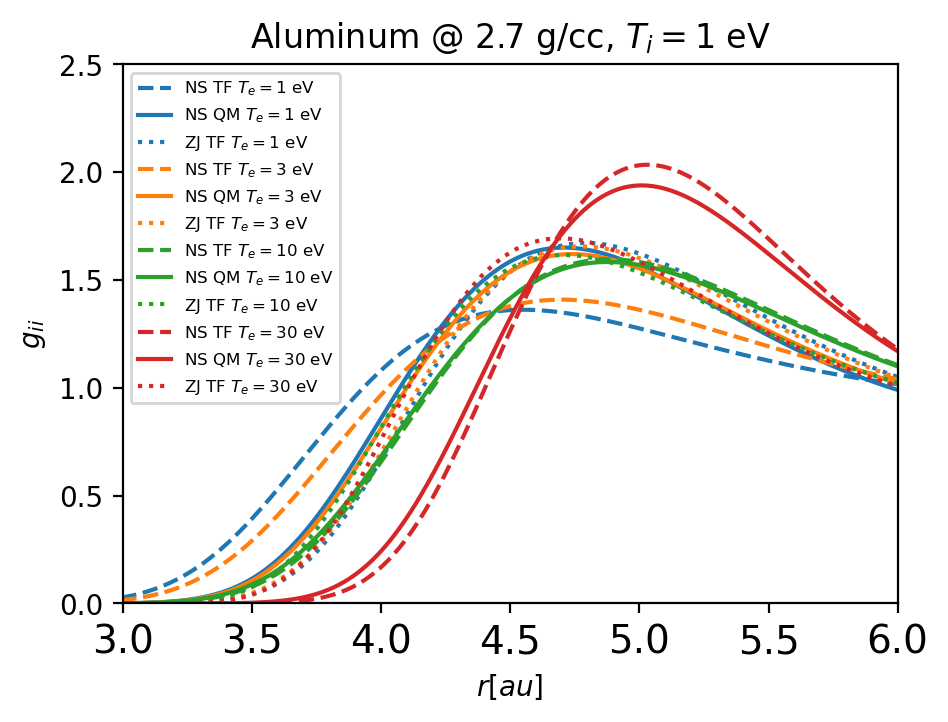

In [4]:
def plot_gii(gii_data, figax = None, **kwargs):#line = None, color=None, label=None):
    if figax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax  = figax
    
    ax.plot(gii_data[0], gii_data[1], **kwargs )#, linestyle=line, color=color, label=label)
    
    # ax.set_xlim(0,15)
    ax.set_xlim(3,6)
    ax.set_ylim(0,2.5)
    
    ax.set_ylabel(r"$g_{ii}$")
    ax.set_xlabel(r"$r [au]$")
    
    ax.legend(fontsize=6)
    
# Fixed Ti
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ eV")

plot_gii(NS_tf_g11, figax = (fig, ax), color=color_cycle[0], linestyle='--', label=r"NS TF $T_e=1$ eV")
plot_gii(NS_ks_g11, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM $T_e=1$ eV")
plot_gii(ZJ_g11, figax = (fig, ax), color=color_cycle[0], linestyle=':', label=r"ZJ TF $T_e=1$ eV")

plot_gii(NS_tf_g12, figax = (fig, ax), color=color_cycle[1], linestyle='--', label=r"NS TF $T_e=3$ eV")
plot_gii(NS_ks_g12, figax = (fig, ax), color=color_cycle[1], linestyle='-', label=r"NS QM $T_e=3$ eV")
plot_gii(ZJ_g12, figax = (fig, ax), color=color_cycle[1], linestyle=':', label=r"ZJ TF $T_e=3$ eV")

plot_gii(NS_tf_g13, figax = (fig, ax), color=color_cycle[2], linestyle='--', label=r"NS TF $T_e=10$ eV")
plot_gii(NS_ks_g13, figax = (fig, ax), color=color_cycle[2], linestyle='-', label=r"NS QM $T_e=10$ eV")
plot_gii(ZJ_g13, figax = (fig, ax), color=color_cycle[2], linestyle=':', label=r"ZJ TF $T_e=10$ eV")

plot_gii(NS_tf_g14, figax = (fig, ax), color=color_cycle[3], linestyle='--', label=r"NS TF $T_e=30$ eV")
plot_gii(NS_ks_g14, figax = (fig, ax), color=color_cycle[3], linestyle='-', label=r"NS QM $T_e=30$ eV")
plot_gii(ZJ_g14, figax = (fig, ax), color=color_cycle[3], linestyle=':', label=r"ZJ TF $T_e=30$ eV")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

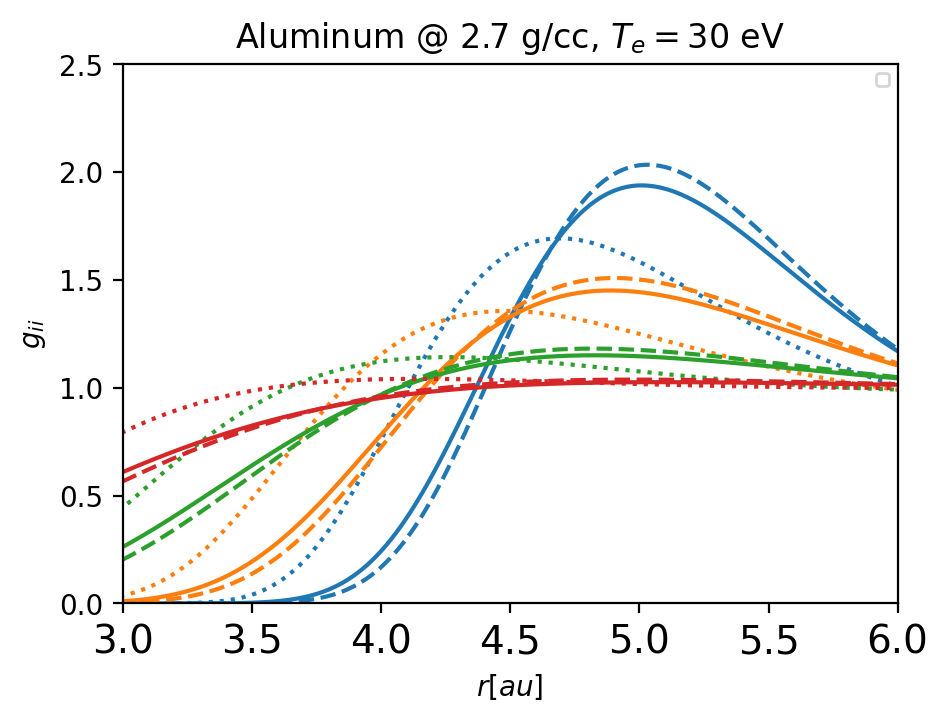

In [5]:
# Fixed Te
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_e = 30 $ eV")

plot_gii(NS_tf_g21, figax = (fig, ax), color=color_cycle[0], linestyle='--')
plot_gii(NS_ks_g21, figax = (fig, ax), color=color_cycle[0], linestyle='-')
plot_gii(ZJ_g21, figax = (fig, ax), color=color_cycle[0], linestyle=':')

plot_gii(NS_tf_g22, figax = (fig, ax), color=color_cycle[1], linestyle='--')
plot_gii(NS_ks_g22, figax = (fig, ax), color=color_cycle[1], linestyle='-')
plot_gii(ZJ_g22, figax = (fig, ax), color=color_cycle[1], linestyle=':')

plot_gii(NS_tf_g23, figax = (fig, ax), color=color_cycle[2], linestyle='--')
plot_gii(NS_ks_g23, figax = (fig, ax), color=color_cycle[2], linestyle='-')
plot_gii(ZJ_g23, figax = (fig, ax), color=color_cycle[2], linestyle=':')

plot_gii(NS_tf_g24, figax = (fig, ax), color=color_cycle[3], linestyle='--')
plot_gii(NS_ks_g24, figax = (fig, ax), color=color_cycle[3], linestyle='-')
plot_gii(ZJ_g24, figax = (fig, ax), color=color_cycle[3], linestyle=':')


## Number Density

In [21]:
def column_cleaning(frame):
    frame.columns = np.roll(frame.columns, len(frame.columns)-1)
    return frame.dropna(how='all', axis=1)

def load_NS_ne_tf_data(filename, ne_type='full'):
    NS_aa = read_csv(filename, skiprows=3, delim_whitespace=True, escapechar="#")#, names=["r", "g"])
    column_cleaning(NS_aa)
    if ne_type=='full':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['nefull'])
    elif ne_type=='bound':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ion'])
    elif ne_type=='empty':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['neext'])
    
def load_NS_ne_ks_data(filename, ne_type='full'):
    NS_aa = read_csv(filename, skiprows=4, delim_whitespace=True, escapechar="#")#, names=["r", "g"])
    column_cleaning(NS_aa)
    if ne_type=='full':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_full'])
    elif ne_type=='bound':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ion'])
    elif ne_type=='empty':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ext'])


NS_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_NS/"

ne_type = 'full'

# Fixed Ti cases
NS_tf_ne11 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne11 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne12 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne12 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne13 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne13 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne14 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne14 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

# Fixed Te cases
NS_tf_ne21 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne21 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne22 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne22 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne23 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne23 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne24 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne24 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

# Mine
ZJ_ne11 = ZJ_aa_11.xs, ZJ_aa_11.ne 
ZJ_ne12 = ZJ_aa_12.xs, ZJ_aa_12.ne 
ZJ_ne13 = ZJ_aa_13.xs, ZJ_aa_13.ne 
ZJ_ne14 = ZJ_aa_14.xs, ZJ_aa_14.ne 
ZJ_ne21 = ZJ_aa_21.xs, ZJ_aa_21.ne 
ZJ_ne22 = ZJ_aa_22.xs, ZJ_aa_22.ne 
ZJ_ne23 = ZJ_aa_23.xs, ZJ_aa_23.ne 
ZJ_ne24 = ZJ_aa_24.xs, ZJ_aa_24.ne 

# ZJ_ne11 = ZJ_aa_11.xs, ZJ_aa_11.n_b 
# ZJ_ne12 = ZJ_aa_12.xs, ZJ_aa_12.n_b 
# ZJ_ne13 = ZJ_aa_13.xs, ZJ_aa_13.n_b 
# ZJ_ne14 = ZJ_aa_14.xs, ZJ_aa_14.n_b 
# ZJ_ne21 = ZJ_aa_21.xs, ZJ_aa_21.n_b 
# ZJ_ne22 = ZJ_aa_22.xs, ZJ_aa_22.n_b 
# ZJ_ne23 = ZJ_aa_23.xs, ZJ_aa_23.n_b 
# ZJ_ne24 = ZJ_aa_24.xs, ZJ_aa_24.n_b 

In [22]:
NS_tf_ne11[1][-1]/np.array(ZJ_aa_11.ni)[-1], np.array(ZJ_aa_11.ne)[-1]/np.array(ZJ_aa_11.ni)[-1]

(1.692828304888758, 4.045003145577413)

In [23]:
from scipy.integrate import simpson
simpson(4*π*NS_tf_ne11[0]**2*NS_tf_ne11[1], x=NS_tf_ne11[0])

13565.54716701985

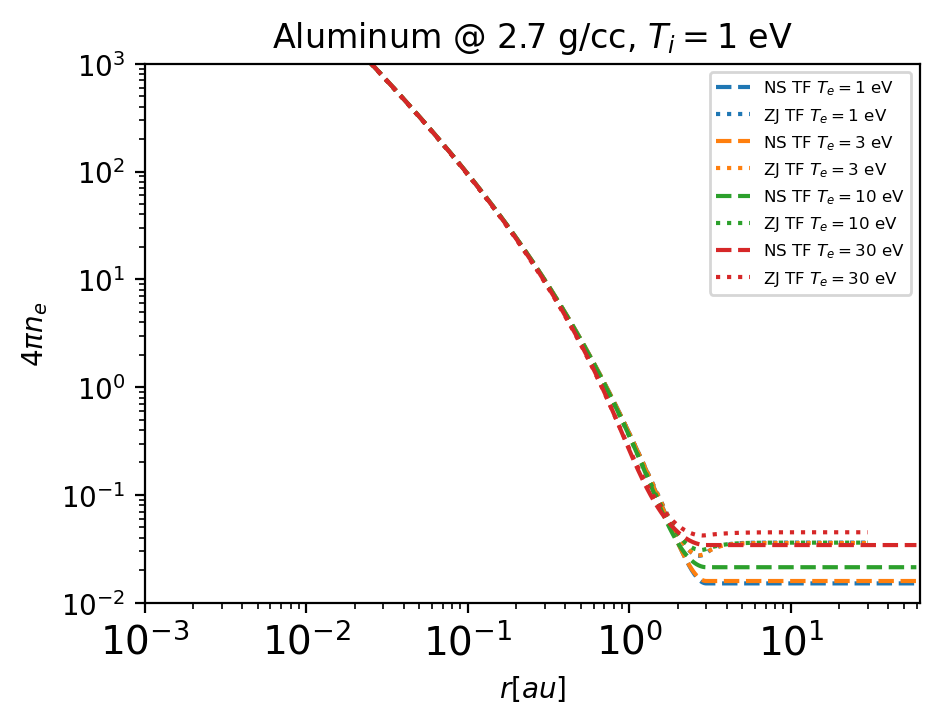

In [29]:
def plot_ne(ne_data, ks=False, figax = None, **kwargs):#line = None, color=None, label=None):
    if figax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax  = figax
    
#     if ks==False:
#         ax.plot(ne_data[0], 4*π*ne_data[0]**2*ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
#     else:
#         ax.plot(ne_data[0], ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        
    if ks==False:
        ax.plot(ne_data[0], ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
    else:
        ax.plot(ne_data[0], (4*π*ne_data[0]**2)**-1*ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        
    if False:
        ax.set_xlim(0,4)
        ax.set_ylim(0, 16)
    else:
        ax.set_xlim(1e-3,None)
        ax.set_yscale('log')#, linthresh=1e-3)
        ax.set_xscale('log')
        ax.set_ylim(1e-2, 1e3)

        
    
    ax.set_ylabel(r"$4 \pi n_{e}$")
    ax.set_xlabel(r"$r [au]$")
    
    ax.legend(fontsize=6)
    
# Fixed Ti
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ eV")

plot_ne(NS_tf_ne11, ks=False, figax = (fig, ax), color=color_cycle[0], linestyle='--', label=r"NS TF $T_e=1$ eV")
# plot_ne(NS_ks_ne11, ks=True, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM $T_e=1$ eV")
plot_ne(ZJ_ne11, figax = (fig, ax), color=color_cycle[0], linestyle=':', label=r"ZJ TF $T_e=1$ eV")

plot_ne(NS_tf_ne12, ks=False,  figax = (fig, ax), color=color_cycle[1], linestyle='--', label=r"NS TF $T_e=3$ eV")
# plot_ne(NS_ks_ne12, ks=True, figax = (fig, ax), color=color_cycle[1], linestyle='-', label=r"NS QM $T_e=3$ eV")
plot_ne(ZJ_ne12, figax = (fig, ax), color=color_cycle[1], linestyle=':', label=r"ZJ TF $T_e=3$ eV")

plot_ne(NS_tf_ne13, ks=False,  figax = (fig, ax), color=color_cycle[2], linestyle='--', label=r"NS TF $T_e=10$ eV")
# plot_ne(NS_ks_ne13, ks=True, figax = (fig, ax), color=color_cycle[2], linestyle='-', label=r"NS QM $T_e=10$ eV")
plot_ne(ZJ_ne13, figax = (fig, ax), color=color_cycle[2], linestyle=':', label=r"ZJ TF $T_e=10$ eV")

plot_ne(NS_tf_ne14, ks=False,  figax = (fig, ax), color=color_cycle[3], linestyle='--', label=r"NS TF $T_e=30$ eV")
# plot_ne(NS_ks_ne14, ks=True, figax = (fig, ax), color=color_cycle[3], linestyle='-', label=r"NS QM $T_e=30$ eV")
plot_ne(ZJ_ne14, figax = (fig, ax), color=color_cycle[3], linestyle=':', label=r"ZJ TF $T_e=30$ eV")
